# ECE 219 Project 4: Regression Analysis and Define Your Own Task!


In [2]:
# import all necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# allows matlab plots to be generated in line
%matplotlib inline

from google.colab import drive
drive.mount("/content/drive/")

# add system path to current directory
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/ECE_219/Project4')

# Dataset 1: Diamond Characteristics

In [3]:
# read the csv file and get the shape
file_path = '/content/drive/MyDrive/Colab Notebooks/ECE_219/Project4/dataset/diamonds.csv'
diamond_df = pd.read_csv(file_path, index_col=0)

rows, columns = diamond_df.shape

print('Total number of rows: {0} and columns: {1}'.format(rows, columns))
diamond_df.head(5)

Total number of rows: 53940 and columns: 10


,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,330,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,327,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,328,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,337,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,338,4.34,4.35,2.75


# 3 Required Steps

## 3.1 Before Training

### 3.1.1 Handling Categorical Features

In [4]:
mapping_table = {'cut':{'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5},
                 'color':{'J': 1, 'I': 2, 'H': 3, 'G': 4, 'F': 5, 'E': 6, 'D': 7},
                 'clarity':{'I1': 1, 'SI2': 2, 'SI1': 3, 'VS2': 4, 'VS1': 5, 
                            'VVS2': 6, 'VVS1': 7, 'IF': 8}
                 }

# convert the categorical features
diamond_df = diamond_df.replace(mapping_table)
diamond_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,5,6,2,61.5,55.0,330,3.95,3.98,2.43
2,0.21,4,6,3,59.8,61.0,327,3.89,3.84,2.31
3,0.23,2,6,5,56.9,65.0,328,4.05,4.07,2.31
4,0.29,4,2,4,62.4,58.0,337,4.20,4.23,2.63
5,0.31,2,1,2,63.3,58.0,338,4.34,4.35,2.75


### 3.1.2 Data Inspection

carat      0.921591
cut       -0.053493
color     -0.172509
clarity   -0.146802
depth     -0.010648
table      0.127134
price      1.000000
x          0.884436
y          0.865422
z          0.861250
Name: price, dtype: float64

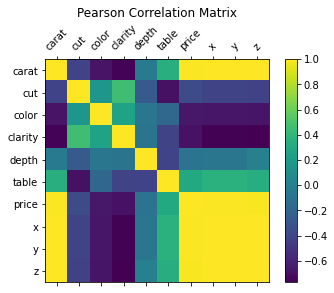

In [6]:
# calculate the pearson correlation
pearson_corr = diamond_df.corr(method='pearson')

# plot
f = plt.figure(figsize=(6, 4))
plt.matshow(pearson_corr.corr(), fignum=f.number)
plt.xticks(range(pearson_corr.select_dtypes(['number']).shape[1]), 
           pearson_corr.select_dtypes(['number']).columns, fontsize=10, rotation=45)
plt.yticks(range(pearson_corr.select_dtypes(['number']).shape[1]), 
           pearson_corr.select_dtypes(['number']).columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.title('Pearson Correlation Matrix', fontsize=12)

# only look at the price column
pearson_corr['price']

<div class="alert alert-block alert-success">
<b>QUESTION 1.1:</b> Plot a heatmap of the Pearson correlation matrix of the dataset columns. Report which features have the highest absolute correlation with the target variable. In the context of either dataset, describe what the correlation patterns suggest.
</div>

<div class="alert alert-block alert-success">
<b>ANSWER 1.1:</b> The plot is shown above. Carat is the feature with the highest absolute correlation with the target variable, price. Based on the pattern of the pearson correlation matrix, one can tell that the features such as carat, x, y and z are highly related to the price and thus are the most important features to utilize to trian the model. The rest of the features, on the other hand, might as well also provide some useful information but not as informative as those four for the purpose of price estimation.
</div>

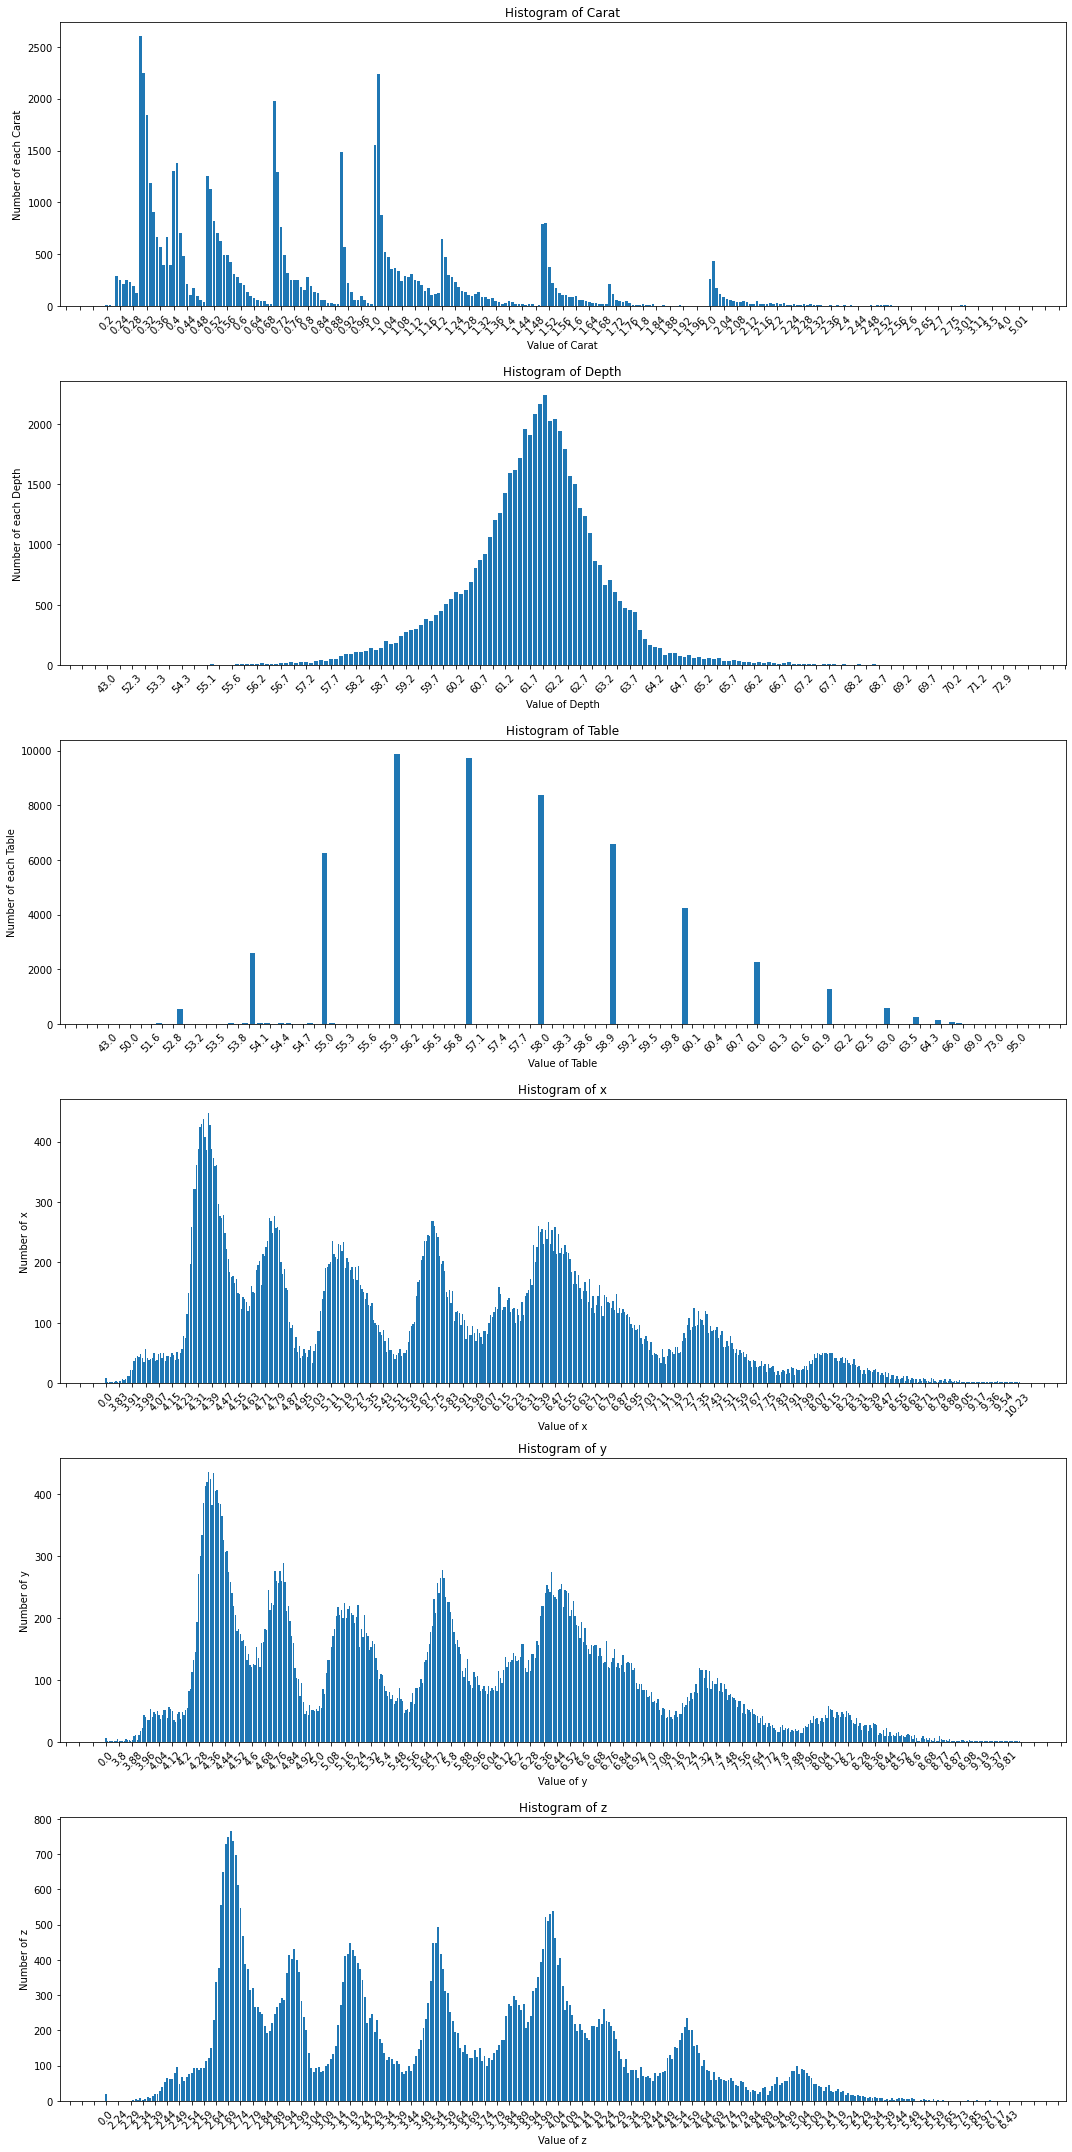

In [ ]:
# the numerical features are carat, depth, table, x, y, z

# plot
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(15, 30))

# histogram of 'carat'
unique, counts = np.unique(diamond_df['carat'].to_numpy(), return_counts=True)
axes[0].bar(range(len(unique)), counts)
axes[0].set_xticks(range(len(unique)), unique, rotation=45)
axes[0].xaxis.set_major_locator(plt.MaxNLocator(100))
axes[0].set_xlabel('Value of Carat')
axes[0].set_ylabel('Number of each Carat')
axes[0].set_title('Histogram of Carat')

# histogram of 'depth'
unique, counts = np.unique(diamond_df['depth'].to_numpy(), return_counts=True)
axes[1].bar(range(len(unique)), counts)
axes[1].set_xticks(range(len(unique)), unique, rotation=45)
axes[1].xaxis.set_major_locator(plt.MaxNLocator(100))
axes[1].set_xlabel('Value of Depth')
axes[1].set_ylabel('Number of each Depth')
axes[1].set_title('Histogram of Depth')

# histogram of 'table'
unique, counts = np.unique(diamond_df['table'].to_numpy(), return_counts=True)
axes[2].bar(range(len(unique)), counts)
axes[2].set_xticks(range(len(unique)), unique, rotation=45)
axes[2].xaxis.set_major_locator(plt.MaxNLocator(100))
axes[2].set_xlabel('Value of Table')
axes[2].set_ylabel('Number of each Table')
axes[2].set_title('Histogram of Table')

# histogram of 'x'
unique, counts = np.unique(diamond_df['x'].to_numpy(), return_counts=True)
axes[3].bar(range(len(unique)), counts)
axes[3].set_xticks(range(len(unique)), unique, rotation=45)
axes[3].xaxis.set_major_locator(plt.MaxNLocator(100))
axes[3].set_xlabel('Value of x')
axes[3].set_ylabel('Number of x')
axes[3].set_title('Histogram of x')

# histogram of 'y'
unique, counts = np.unique(diamond_df['y'].to_numpy(), return_counts=True)
axes[4].bar(range(len(unique)), counts)
axes[4].set_xticks(range(len(unique)), unique, rotation=45)
axes[4].xaxis.set_major_locator(plt.MaxNLocator(100))
axes[4].set_xlabel('Value of y')
axes[4].set_ylabel('Number of y')
axes[4].set_title('Histogram of y')

# histogram of 'z'
unique, counts = np.unique(diamond_df['z'].to_numpy(), return_counts=True)
axes[5].bar(range(len(unique)), counts)
axes[5].set_xticks(range(len(unique)), unique, rotation=45)
axes[5].xaxis.set_major_locator(plt.MaxNLocator(100))
axes[5].set_xlabel('Value of z')
axes[5].set_ylabel('Number of z')
axes[5].set_title('Histogram of z')

fig.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
<b>QUESTION 1.2:</b> Plot the histogram of numerical features. What preprocessing can be done if the distribution of a feature has high skewness?
</div>

<div class="alert alert-block alert-success">
<b>ANSWER 1.2:</b> The results of the histogram of numerical features are shown above. If the distribution of a certain feature has high skewness, one can apply normalization or standardization techniques to resolve it.  
</div>

<Axes: >

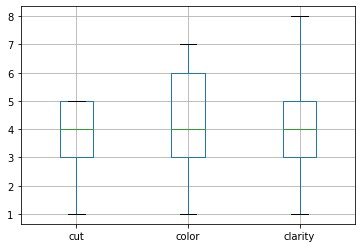

In [ ]:
diamond_df.boxplot(column=['cut', 'color', 'clarity'])

<Axes: >

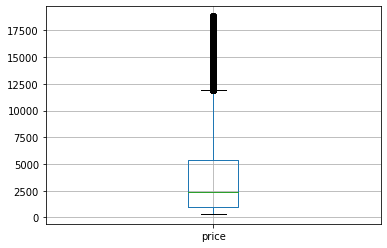

In [7]:
diamond_df.boxplot(column=['price'])

<div class="alert alert-block alert-success">
<b>QUESTION 1.3:</b> Construct and inspect the box plot of categorical features vs target variable. What do you find?
</div>

<div class="alert alert-block alert-success">
<b>ANSWER 1.3:</b> The price of a diamond is affected differently between each categorical feature. It seems not to depend on the quality of the cut since most of the diamond (the upper quartile) have high quality cut but the price is still relative low. Clarity and color, on the other hand, show more correlation with the price. But still, the price of most of the diamond (the upper quartile)is relative low compared to the highest price, which means there might be other factors that affect more to the price of a diamond.
</div>

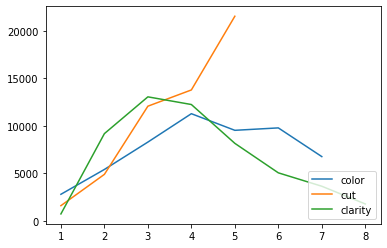

In [8]:
color_unique, color_counts = np.unique(diamond_df['color'].to_numpy(), return_counts=True)
cut_unique, cut_counts = np.unique(diamond_df['cut'].to_numpy(), return_counts=True)
clarity_unique, clarity_counts = np.unique(diamond_df['clarity'].to_numpy(), return_counts=True)

plt.plot(color_unique, color_counts, label='color')
plt.plot(cut_unique, cut_counts, label='cut')
plt.plot(clarity_unique, clarity_counts, label='clarity')
plt.legend(loc=4)
plt.show()

<div class="alert alert-block alert-success">
<b>QUESTION 1.4:</b> Plot the counts by color, cut and clarity.
</div>

<div class="alert alert-block alert-success">
<b>ANSWER 1.4:</b> The plots are shown above.
</div>

### 3.1.3 Standardization

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn_pandas import DataFrameMapper

# split into training features and target
X_df = diamond_df[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y','z']]
y_df = diamond_df['price']

mapper = DataFrameMapper([(X_df.columns, StandardScaler())])
X_scaled = mapper.fit_transform(X_df.copy(), len(X_df.columns))
X_scaled_df = pd.DataFrame(X_scaled, index=X_df.index, columns=X_df.columns)
X_scaled_df.head(5)

,carat,cut,color,clarity,depth,table,x,y,z
1,-1.198168,0.981473,0.937163,-1.245215,-0.174092,-1.099672,-1.587837,-1.536196,-1.571129
2,-1.240361,0.085889,0.937163,-0.638095,-1.360738,1.585529,-1.641325,-1.658774,-1.741175
3,-1.198168,-1.705279,0.937163,0.576145,-3.385019,3.375663,-1.498691,-1.457395,-1.741175
4,-1.071587,0.085889,-1.414272,-0.030975,0.454133,0.242928,-1.364971,-1.317305,-1.287720
5,-1.029394,-1.705279,-2.002131,-1.245215,1.082358,0.242928,-1.240167,-1.212238,-1.117674


<div class="alert alert-block alert-success">
<b>QUESTION 2.1:</b> Standardize feature columns and prepare them for training.
</div>


<div class="alert alert-block alert-success">
<b>ANSWER 2.1:</b> The standardized results are shown above.
</div>

### 3.1.4 Feature Selection

In [10]:
from sklearn.feature_selection import mutual_info_regression, f_regression

# get features and target
X = X_scaled
y = y_df.to_numpy()

# calculate the mutual info and f-score 
mi_reg = mutual_info_regression(X, y)
f_reg = f_regression(X, y)

In [11]:
mi_reg_pd = pd.Series(mi_reg)
mi_reg_pd.index = X_scaled_df.columns
mi_reg_pd.sort_values(ascending=False)

carat      1.652971
y          1.420542
x          1.413453
z          1.361221
clarity    0.215971
color      0.137740
cut        0.058884
table      0.035162
depth      0.031628
dtype: float64

In [12]:
f_reg_pd = pd.DataFrame(f_reg, index=np.array(['F-statistic', 'p-values']), 
                        columns=X_scaled_df.columns)
f_reg_pd

,carat,cut,color,clarity,depth,table,x,y,z
F-statistic,304051.486619,1.547845e+02,1654.401244,1.188007e+03,6.115863,8.861194e+02,193741.523066,160915.662263,154923.266553
p-values,0.000000,1.746019e-35,0.000000,1.571721e-257,0.013400,3.769963e-193,0.000000,0.000000,0.000000


<div class="alert alert-block alert-success">
<b>QUESTION 2.2:</b> You **may** use these functions to select features that yield better regression results (especially in the classical models). Describe how this step qualitatively affects the performance of your models in terms of test RMSE. Is it true for all model types? Also list two features for either dataset that has the lowest MI w.r.t to the target.
</div>

<div class="alert alert-block alert-success">
<b>ANSWER 2.2:</b> Feature selection is an important step in machine learning. A good and strong correlated feature with high MI value can lead to a model with high performance and low test RMSE. A week or uncorrelated feature with low MI value will cause a hard time to train a good and robust model since such feature is not representative and uninformative enough to the target variable and is like noise to the model. Thus, including such feature, will increase the test RMSE and decrease the model performance. In diamond dataset, 'depth' and 'table' are the features with the lowest MI w.r.t to the target. 
</div>

## 3.2 Training + 3.3 Evaluation

<div class="alert alert-block alert-success">
<b>QUESTION 3:</b> For random forest model, measure “Out-of-Bag Error” (OOB) as well.Explain what OOB error and $R^2$ score means given this link.
</div>

<div class="alert alert-block alert-success">
<b>ANSWER 3:</b> The out-of-bag (OOB) error is the average error on each training sample $x_i$ predicted by the trained models such as random forest that didn't include $x_i$ in their bootstrap sample under the utilization of bootstrap aggregating technique/algorithm. $R^2$ score is a statistical measure in a regression model that determines the proportion of variance in the dependent variable that can be explained by the independent variable. It explains the goodness of the data fitting in the regression model and the variance of one variable against another. 
</div>

### 3.3.1 Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit, KFold

In [34]:
'''
Training regression models with standardized features
'''

# get the standardized features and select
# here I choose 'carat', 'cut', 'color', 'clarity', 'x', 'y', 'z' as features to train
X = X_scaled_df[['carat', 'cut', 'color', 'clarity', 'x', 'y', 'z']].to_numpy()
y = y_df.to_numpy()


# normal linear regression
LR = LinearRegression()
cv = KFold(n_splits=10, shuffle=True, random_state=42)
LR_errors = cross_val_score(LR, X, y , cv=cv, scoring='neg_root_mean_squared_error')
LR_error = LR_errors.mean()*-1
print('Linear Regression - RMSE: {:5.4f}'.format(LR_error))


# lasso regression, alpha: 1e-5 ~ 1e5
l1_best_error = np.inf
LR_l1_error_list = []
for k in range(-5, 5+1):
    # lasso model
    alpha = 10**k
    LR_l1 = Lasso(alpha)
    # train with cross validation
    cv = KFold(n_splits=10, shuffle=True, random_state=42)
    LR_l1_errors = cross_val_score(LR_l1, X, y, cv=cv, scoring='neg_root_mean_squared_error')
    cur_error = LR_l1_errors.mean()*-1
    LR_l1_error_list.append(cur_error)
    # find the best
    if cur_error < l1_best_error:
        l1_best_error = cur_error
        l1_best_alpha = alpha
print('Lasso Regression - RMSE: {:5.4f} with the best alpha: {}'.format(l1_best_error, l1_best_alpha))


# ridge regression, alpha: 1e-5 ~ 1e5
l2_best_error = np.inf
LR_l2_error_list = []
for k in range(-5, 5+1):
    # lasso model
    alpha = 10**k
    LR_l2 = Ridge(alpha)
    # train with cross validation
    cv = KFold(n_splits=10, shuffle=True, random_state=42)
    LR_l2_errors = cross_val_score(LR_l2, X, y, cv=cv, scoring='neg_root_mean_squared_error')
    cur_error = LR_l2_errors.mean()*-1
    LR_l2_error_list.append(cur_error)
    # find the best
    if cur_error < l2_best_error:
        l2_best_error = cur_error
        l2_best_alpha = alpha
print('Ridge Regression - RMSE: {:5.4f} with the best alpha: {}'.format(l2_best_error, l2_best_alpha))

Linear Regression - RMSE: 1222.4796
Lasso Regression - RMSE: 1221.4436 with the best alpha: 1
Ridge Regression - RMSE: 1222.3082 with the best alpha: 10


<div class="alert alert-block alert-success">
<b>QUESTION 4.1:</b> Explain how each regularization scheme affects the learned parameter set.
</div>

<div class="alert alert-block alert-success">
<b>ANSWER 4.1:</b> By adding the regularization term, there is a chance that the validation error will reduce due to the reduction of the variance of the model. For lasso regression, an $l_1$-norm term is added to the objective function which helps to handle the sparsity of the learned coefficients, meaning that it decreases the less important feature’s coefficient to zero and inherently performs feature selection. For ridge regression, an $l_2$-norm term is added to the objective function which provides the ability to avoid overfitting. It adds a penalty to the excessive fluctuation of the learned coefficients and forces weights toward zero.
</div>

<div class="alert alert-block alert-success">
<b>QUESTION 4.2:</b> Report your choice of the best regularization scheme along with the optimal penalty parameter and explain how you computed it.
</div>

<div class="alert alert-block alert-success">
<b>ANSWER 4.2:</b> Based on the results shown above, the best regularization model is lasso regression with $\alpha = 1$ as the optimal penalty parameter. I find this by computing each regression model and compare their best achieved error. For each lasso and ridge regression, $\alpha$ is varies in range $10^{-5}$ to $10^{5}$. The errors are then computed and compared to search for the optimal penalty parameter.
</div>

In [35]:
'''
Training ridge regression with original features (no standardization)
'''

# get the original features and select
# here I choose 'carat', 'cut', 'color', 'clarity', 'x', 'y', 'z' as features to train
X_orig = X_df[['carat', 'cut', 'color', 'clarity', 'x', 'y', 'z']].to_numpy()
y = y_df.to_numpy()

# ridge regression, alpha: 1e-5 ~ 1e5
l2_orig_best_error = np.inf
LR_l2_orig_error_list = []
for k in range(-5, 5+1):
    # lasso model
    alpha = 10**k
    LR_l2_orig = Ridge(alpha)
    # train with cross validation
    cv = KFold(n_splits=10, shuffle=True, random_state=42)
    LR_l2_orig_errors = cross_val_score(LR_l2_orig, X_orig, y, cv=cv, 
                                        scoring='neg_root_mean_squared_error')
    cur_error = LR_l2_orig_errors.mean()*-1
    LR_l2_orig_error_list.append(cur_error)
    # find the best
    if cur_error < l2_orig_best_error:
        l2_orig_best_error = cur_error
        l2_orig_best_alpha = alpha
print('Ridge Regression with original data '\
      '- RMSE: {:5.4f} with the best alpha: {}'.format(l2_orig_best_error, l2_orig_best_alpha))

Ridge Regression with original data - RMSE: 1222.4035 with the best alpha: 10


<div class="alert alert-block alert-success">
<b>QUESTION 4.3:</b>  Does feature standardization play a role in improving the model performance (in the cases with ridge regularization)? Justify your answer.
</div>

<div class="alert alert-block alert-success">
<b>ANSWER 4.3:</b> Yes. According to the results shown above, a RMSE of 1222.3082 is achieved with standardization and a RMSE of 1222.4035 without standardization. Therefore, we can observe a slight improvement of performance by applying standardization.
</div>

In [37]:
import statsmodels.api as sm

# get selected features
X = X_scaled_df[['carat', 'cut', 'color', 'clarity', 'x', 'y', 'z']].to_numpy()
y = y_df.to_numpy()

# find p-values
estimator = sm.OLS(y, X)
est_fit = estimator.fit()
print(est_fit.summary2().tables[1]['P>|t|'])

x1     0.000000e+00
x2     1.486538e-22
x3    4.895631e-189
x4     0.000000e+00
x5     2.786948e-10
x6     2.662459e-01
x7     1.164380e-02
Name: P>|t|, dtype: float64


<div class="alert alert-block alert-success">
<b>QUESTION 4.4:</b> Some linear regression packages return p-values for different features. What is the meaning of these p-values and how can you infer the most significant features?
</div>

<div class="alert alert-block alert-success">
<b>ANSWER 4.4:</b> The linear regression p-value for each independent variable tests the null hypothesis that the variable has no correlation with the dependent variable. A low p-value indicates that the null hypothesis can be rejected (no effect). This means that a predictor is likely to be a meaningful in addition to the model because changes in the predictor's value are related to changes in the response variable. On the other hand, a larger (insignificant) p-value suggests that changes in the predictor are not associated with changes in the response. Therefore, it is typical to use the coefficient p-values to determine which features to keep in the regression model. Features with the lowest value of p-value are the most significant, which are 'carat' and 'clarity' in this dataset.
</div>

### 3.3.2 Polynomial Regression

In [38]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [42]:
'''
Training polynomial regression with multiple features
'''

# get the standardized features, select, and then multiply together
# here I choose 'carat', 'y', 'x' as features to train
X = X_scaled_df[['carat', 'y', 'x']].to_numpy()
X = np.prod(X, axis=1)
y = y_df.to_numpy()

# polynomial regression
PR_best_error = np.inf
PR_error_list = []
degrees = np.arange(1, 6+1)
for i in degrees:
    # preprocessing (max degress = 6)
    poly = PolynomialFeatures(degree=i, include_bias=False)
    poly_features = poly.fit_transform(X.reshape(-1, 1))

    # train polynomial regression with cross validation
    PR = LinearRegression()
    cv = KFold(n_splits=10, shuffle=True, random_state=42)
    PR_errors = cross_val_score(PR, poly_features, y, cv=cv, 
                                scoring='neg_root_mean_squared_error')
    PR_cur_error = PR_errors.mean()*-1
    PR_error_list.append(PR_cur_error)

    # find the best
    if PR_cur_error < PR_best_error:
        PR_best_error = PR_cur_error
        PR_best_degree = i
print('Polynomial Regression with multiple features - RMSE: {:5.4f} '\
      'with the best degree: {}'.format(PR_best_error, PR_best_degree))

Polynomial Regression with multiple features - RMSE: 2753.7405 with the best degree: 2


In [44]:
'''
Training polynomial regression with single feature
'''

# get the standardized features, select, and then multiply together
# here I choose 'carat' only
X = X_scaled_df[['carat']].to_numpy()
X = np.prod(X, axis=1)
y = y_df.to_numpy()

# polynomial regression
PR_best_error = np.inf
PR_error_list = []
degrees = np.arange(1, 6+1)
for i in degrees:
    # preprocessing (max degress = 6)
    poly = PolynomialFeatures(degree=i, include_bias=False)
    poly_features = poly.fit_transform(X.reshape(-1, 1))

    # train polynomial regression with cross validation
    PR = LinearRegression()
    cv = KFold(n_splits=10, shuffle=True, random_state=42)
    PR_errors = cross_val_score(PR, poly_features, y, cv=cv, 
                                scoring='neg_root_mean_squared_error')
    PR_cur_error = PR_errors.mean()*-1
    PR_error_list.append(PR_cur_error)

    # find the best
    if PR_cur_error < PR_best_error:
        PR_best_error = PR_cur_error
        PR_best_degree = i
print('Polynomial Regression based on carat only - RMSE: {:5.4f} '\
      'with the best degree: {}'.format(PR_best_error, PR_best_degree))


# get the standardized features, select, and then multiply together
# here I choose 'depth' only
X = X_scaled_df[['depth']].to_numpy()
X = np.prod(X, axis=1)
y = y_df.to_numpy()

# polynomial regression
PR_best_error = np.inf
PR_error_list = []
degrees = np.arange(1, 6+1)
for i in degrees:
    # preprocessing (max degress = 6)
    poly = PolynomialFeatures(degree=i, include_bias=False)
    poly_features = poly.fit_transform(X.reshape(-1, 1))

    # train polynomial regression with cross validation
    PR = LinearRegression()
    cv = KFold(n_splits=10, shuffle=True, random_state=42)
    PR_errors = cross_val_score(PR, poly_features, y, cv=cv, 
                                scoring='neg_root_mean_squared_error')
    PR_cur_error = PR_errors.mean()*-1
    PR_error_list.append(PR_cur_error)

    # find the best
    if PR_cur_error < PR_best_error:
        PR_best_error = PR_cur_error
        PR_best_degree = i
print('Polynomial Regression based on clarity only - RMSE: {:5.4f} '\
      'with the best degree: {}'.format(PR_best_error, PR_best_degree))

Polynomial Regression based on carat only - RMSE: 1435.8302 with the best degree: 6
Polynomial Regression based on clarity only - RMSE: 3983.7127 with the best degree: 6


<div class="alert alert-block alert-success">
<b>QUESTION 5.1:</b> What are the most salient features? Why?
</div>

<div class="alert alert-block alert-success">
<b>ANSWER 5.1:</b> For training based on single feature, 'carat' is the most salient feature since it achieves the lowest RMSE compared with the others. For training based on multiple features, 'carat', 'y', 'x' are the most salient features. Based on the experients where I test with different combinations, fusing 'carat', 'y', 'x' features achieves the lowest RMSE. Removing any one of them or adding other features will increase the error.
</div>

<div class="alert alert-block alert-success">
<b>QUESTION 5.2:</b> What degree of polynomial is best? How did you find the optimal degree? What does a very high-order polynomial imply about the fit on the training data? What about its performance on testing data?
</div>

<div class="alert alert-block alert-success">
<b>ANSWER 5.2:</b> For training based on multiple features, the optimal degree of polynomial is 2. I find this by looping through different degree of polynomial, training the models and comparing the achieved RMSE errors. A very high-order polynomial implies that the fit get wigglier to the training data, meaning it tries to fit the trianing data perfectly. This, however, could lead to overfitting problem and thus cause higher test / validation RMSE, which corresponds to a worse performance. 
</div>

### 3.3.3 Neural Network

In [130]:
from sklearn.neural_network import MLPRegressor
# grid seach related
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [131]:
'''
Training neural network with standardized features
'''

# get the standardized features and select
# here I choose 'carat', 'cut', 'color', 'clarity', 'x', 'y', 'z' as features to train
X = X_scaled_df[['carat', 'cut', 'color', 'clarity', 'x', 'y', 'z']].to_numpy()
y = y_df.to_numpy()

# set up pipeline
pipeline = Pipeline([
    ('nn', MLPRegressor(learning_rate='adaptive')),
])

# parameters
HIDDEN_LAYER_SIZES = [(64, ), (32, ), (16, ), (16, 8), (32, 16), (32, 16, 8)]
ALPHA = [1e-3, 1e-4, 1e-5] # 1e-4, 1e-5

param_grid = [
    {
        'nn__hidden_layer_sizes': HIDDEN_LAYER_SIZES, # 6 choices
        'nn__alpha': ALPHA                            # 3 choices
        # 18 choices in total
    },
]

In [136]:
# start grid search
num_folds = 10
grid = GridSearchCV(pipeline, param_grid=param_grid, cv=num_folds,
                    scoring='neg_root_mean_squared_error', n_jobs=1)
grid.fit(X, y)

In [140]:
# get all mean test scores on validation (max 20)
best_scores = np.sort(grid.cv_results_['mean_test_score'])[::-1][:20]
# print('The test scores on validation are: {}'.format(best_scores*-1))

# get the corresponding indices
best_scores_idx = np.argsort(grid.cv_results_['mean_test_score'])[::-1][:20]

# print the best combinations in descending order
print('The best combinations from top to bottom are:')
for i in range(len(best_scores_idx)):
    print('{} - RMSE: {}'.format(grid.cv_results_['params'][best_scores_idx[i]], best_scores[i]*-1))

The best combinations from top to bottom are:
{'nn__alpha': 1e-05, 'nn__hidden_layer_sizes': (32, 16, 8)} - RMSE: 723.6293871652804
{'nn__alpha': 1e-05, 'nn__hidden_layer_sizes': (16, 8)} - RMSE: 726.3236031015405
{'nn__alpha': 0.001, 'nn__hidden_layer_sizes': (32, 16)} - RMSE: 730.7512714577322
{'nn__alpha': 1e-05, 'nn__hidden_layer_sizes': (32, 16)} - RMSE: 731.9783171963811
{'nn__alpha': 0.0001, 'nn__hidden_layer_sizes': (32, 16)} - RMSE: 770.9000980691015
{'nn__alpha': 0.0001, 'nn__hidden_layer_sizes': (16, 8)} - RMSE: 771.1557310811
{'nn__alpha': 0.0001, 'nn__hidden_layer_sizes': (32, 16, 8)} - RMSE: 777.4503395135331
{'nn__alpha': 0.0001, 'nn__hidden_layer_sizes': (64,)} - RMSE: 793.8125700290535
{'nn__alpha': 0.001, 'nn__hidden_layer_sizes': (16, 8)} - RMSE: 793.8975042772227
{'nn__alpha': 0.001, 'nn__hidden_layer_sizes': (64,)} - RMSE: 794.4192147904672
{'nn__alpha': 1e-05, 'nn__hidden_layer_sizes': (64,)} - RMSE: 794.9277815467547
{'nn__alpha': 0.001, 'nn__hidden_layer_sizes':

<div class="alert alert-block alert-success">
<b>QUESTION 6.1:</b> Adjust your network size (number of hidden neurons and depth), and weight decay as regularization. Find a good hyper-parameter set systematically (no more than 20 experiments in total).
</div>

<div class="alert alert-block alert-success">
<b>ANSWER 6.1:</b> To find a good hyper-parameter set systematically, I apply grid search at here and the results are shown above. I set the following values for each hyperparameter:
<ul>
  <li>'hidden_layer_sizes': [(64, ), (32, ), (16, ), (16, 8), (32, 16), (32, 16, 8)] </li>
  <li>'alpha' (weight decay) : [$10^{-3}$, $10^{-4}$, $10^{-5}$] </li>
</ul>
</div>

<div class="alert alert-block alert-success">
<b>QUESTION 6.2:</b> How does the performance generally compare with linear regression? Why?
</div>

<div class="alert alert-block alert-success">
<b>ANSWER 6.2:</b> Generally, the neural network model performs better than the linear regression model. The worst RMSE score achieved in NN is 1027.65, whereas the best score lasso regressor achieved is 1221.44. The reason why NN performs better is because it introduces non-linearity in training. Since most of the real world data are not fully linearly seperable, model with the capability of non-linear transformation will yield better performance by fitting the training data better.
</div>

<div class="alert alert-block alert-success">
<b>QUESTION 6.3:</b> What activation function did you use for the output and why? You may use none
</div>

<div class="alert alert-block alert-success">
<b>ANSWER 6.3:</b> Since we are doing regression at here and not classification, I didn't use any activation function like sigmoid or so for the output layer. I just let the model predict the regression value.
</div>

<div class="alert alert-block alert-success">
<b>QUESTION 6.4:</b> What is the risk of increasing the depth of the network too far?
</div>

<div class="alert alert-block alert-success">
<b>ANSWER 6.4:</b> Overfitting is the risk of increasing the depth of the network too far as the model complexity becomes too high and tries the fit the training data perfectly.
</div>

### 3.3.4 Random Forest

In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit, KFold

In [72]:
'''
Training random forest wih standardized features
'''

# get the standardized features and select
# here I choose 'carat', 'y', 'x', 'z', 'clarity', 'color' as features to train
X = X_scaled_df[['carat', 'cut', 'color', 'clarity', 'x', 'y', 'z']].to_numpy()
y = y_df.to_numpy()

# Random Forest
RFR = RandomForestRegressor(max_features=3, n_estimators=100, max_depth=4, oob_score=True)
# train with cross validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)
RFR_errors = cross_val_score(RFR, X, y, cv=cv, scoring='neg_root_mean_squared_error')
RFR_error = RFR_errors.mean()*-1

print('Random Forest Regression - RMSE: {:5.4f}'.format(RFR_error))

Random Forest Regression - RMSE: 1101.0223


<div class="alert alert-block alert-success">
<b>QUESTION 7.1:</b> Explain how these hyper-parameters affect the overall performance. Describe if and how each hyper-parameter results in a regularization effect during training.
</div>

<div class="alert alert-block alert-success">
<b>ANSWER 7.1:</b> After testing around with different setting of those hyper-parameters, one can find out that increasing either one of those will result in lower RMSE, meaning a better model performance. However, with such flexibility decision trees provide, the model might also easily overfit the data since they can keep growing until having exactly one leaf node for every single data point and thus perfectly predicting all of them. To avoid this and achieve some regularization effect, one can limit these hyper-parameters. By limiting the maximum number of features, we reduce the number of features to be considered when looking for the best split, which reduces the chance of overfitting. Limiting the number of trees, can also reduce the overall complexity of the random forest regressor and thus reduce overfitting. Lastly and most importantly, limiting the depth of each tree can avoid the tree keep growing and overfit the training data, which is also a regularization effect.
</div>

<div class="alert alert-block alert-success">
<b>QUESTION 7.2:</b> How do random forests create a highly non-linear decision boundary despite the fact
that all we do at each layer is apply a threshold on a feature?
</div>

<div class="alert alert-block alert-success">
<b>ANSWER 7.2:</b> Random forests are able to create a highly non-linear decision boundary because they cluster the data based on threshold at each layer and create lots of rectangular-like clusters with such decision boundary (like vertical/horizontal lines). These rectangle cluster of the same class can be far away from each other with other class rectangles in between which is similar to how nonlinear relations are modeled. This is why it can create a highly non-linear decision boundary. Moreover, the final decision is also based on the bootstrap aggregation, which also acts as extra non-linear layer.
</div>

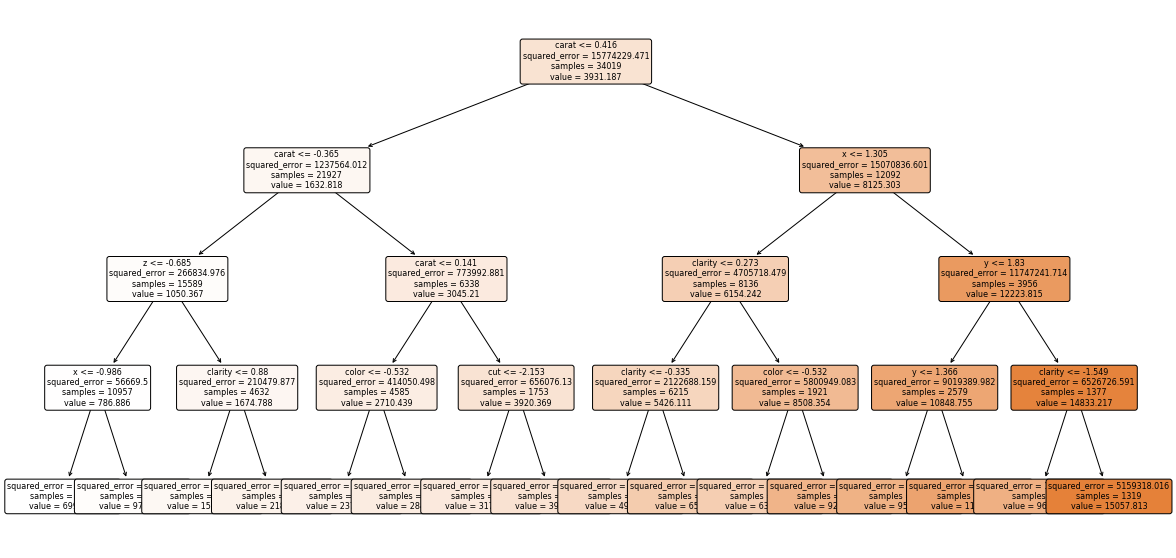

In [87]:
'''
plot the structure of one of the decision trees
'''

from sklearn.tree import plot_tree

# Train
RFR = RandomForestRegressor(max_features=3, n_estimators=100, 
                            max_depth=4, oob_score=True)
RFR.fit(X, y)

fig, axe = plt.subplots(figsize=(20,10))
tree_structure = plot_tree(RFR.estimators_[13], 
                           feature_names=['carat', 'cut', 'color', 'clarity', 'x', 'y', 'z'],
                           class_names=['price'], ax=axe, fontsize=8,
                           filled=True, impurity=True, rounded=True)

<div class="alert alert-block alert-success">
<b>QUESTION 7.3:</b> Randomly pick a tree in your random forest model (with maximum depth of 4) and plot its structure. Which feature is selected for branching at the root node? What can you infer about the importance of this feature as opposed to others? Do the important features correspond to what you got in part 3.3.1?
</div>

<div class="alert alert-block alert-success">
<b>ANSWER 7.3:</b> The example of tree structure is shown above. The feature selected for branching at the root node is 'carat', which means this is the most important feature compared to others as it yields the decision boundary with the lowest error. This result of the most important feature corresponds to the result in part 3.3.1.
</div>

In [88]:
print('The out-of-bag (OOB) error is: {}'.format(RFR.oob_score_))

The out-of-bag (OOB) error is: 0.9241314326322944


<div class="alert alert-block alert-success">
<b>QUESTION 7.4:</b> Measure “Out-of-Bag Error” (OOB). Explain what OOB error and R2 score means.
</div>

<div class="alert alert-block alert-success">
<b>ANSWER 7.4:</b> 
The measure of OOB is 0.9241.

The out-of-bag (OOB) error is the average error on each training sample $x_i$ predicted by the trained models such as random forest that didn't include $x_i$ in their bootstrap sample under the utilization of bootstrap aggregating technique/algorithm. $R^2$ score is a statistical measure in a regression model that determines the proportion of variance in the dependent variable that can be explained by the independent variable. It explains the goodness of the data fitting in the regression model and the variance of one variable against another.
</div>

### 3.3.5 LightGBM, CatBoost and Bayesian Optimization

In [68]:
# ! pip install scikit-optimize

In [124]:
import lightgbm as lgb
from skopt import BayesSearchCV

In [137]:
# start grid search
opt = BayesSearchCV(
    lgb.LGBMRegressor(task='train', application='regression',
                      objective='root_mean_squared_error',
                      metric='rmse', random_state=42),
    {
        'num_leaves':[7, 15, 31],
        'max_depth' :[4, 8, 10],
        'min_data_in_leaf':[20, 30],
    },
    scoring='neg_root_mean_squared_error', 
    n_jobs=1,
    cv=10
)

opt.fit(X, y)

In [139]:
# get all mean test scores on validation (max 20)
best_scores = np.sort(opt.cv_results_['mean_test_score'])[::-1][:20]
# print('The test scores on validation are: {}'.format(best_scores*-1))

# get the corresponding indices
best_scores_idx = np.argsort(opt.cv_results_['mean_test_score'])[::-1][:20]

# print the best combinations in descending order
print('The best combinations from top to bottom are:')
for i in range(len(best_scores_idx)):
    print('{} - RMSE: {}'.format(opt.cv_results_['params'][best_scores_idx[i]], best_scores[i]*-1))

The best combinations from top to bottom are:
OrderedDict([('max_depth', 8), ('min_data_in_leaf', 29), ('num_leaves', 15)]) - RMSE: 654.4696527746863
OrderedDict([('max_depth', 8), ('min_data_in_leaf', 29), ('num_leaves', 15)]) - RMSE: 654.4696527746863
OrderedDict([('max_depth', 8), ('min_data_in_leaf', 29), ('num_leaves', 15)]) - RMSE: 654.4696527746863
OrderedDict([('max_depth', 8), ('min_data_in_leaf', 29), ('num_leaves', 15)]) - RMSE: 654.4696527746863
OrderedDict([('max_depth', 8), ('min_data_in_leaf', 29), ('num_leaves', 15)]) - RMSE: 654.4696527746863
OrderedDict([('max_depth', 8), ('min_data_in_leaf', 29), ('num_leaves', 15)]) - RMSE: 654.4696527746863
OrderedDict([('max_depth', 8), ('min_data_in_leaf', 29), ('num_leaves', 15)]) - RMSE: 654.4696527746863
OrderedDict([('max_depth', 8), ('min_data_in_leaf', 29), ('num_leaves', 15)]) - RMSE: 654.4696527746863
OrderedDict([('max_depth', 8), ('min_data_in_leaf', 29), ('num_leaves', 15)]) - RMSE: 654.4696527746863
OrderedDict([('max

<div class="alert alert-block alert-success">
<b>QUESTION 8.1:</b> Read the documentation of LightGBM OR CatBoost and determine the important hyperparameters along with a search space for the tuning of these parameters (keep the search space small).
</div>

<div class="alert alert-block alert-success">
<b>ANSWER 8.1:</b> The important hyperparameters for LightGBM are 'num_leaves', 'max_depth', 'min_data_in_leaf' since they are similar hyperparameters as in random forest regression that also provide the regularization effect during training. For the search space, I set the following values for each hyperparameter:
<ul>
  <li>'num_leaves': [7, 15, 31] </li>
  <li>'max_depth' : [4, 8, 10] </li>
  <li>'min_data_in_leaf': [20, 30] </li>
</ul>
</div>

<div class="alert alert-block alert-success">
<b>QUESTION 8.2:</b> Apply Bayesian optimization using skopt.BayesSearchCV from scikit-optmize to find the ideal hyperparameter combination in your search space. Report the best hyperparameter set found and the corresponding RMSE.
</div>

<div class="alert alert-block alert-success">
<b>ANSWER 8.2:</b> The results of Bayesian optimization are shown above. The best found hyperparameter set is ('max_depth' = 8, 'min_data_in_leaf' = 29, 'num_leaves' = 15) with the lowest RMSE: 654.47.
</div>

<div class="alert alert-block alert-success">
<b>QUESTION 8.3:</b> Qualitatively interpret the effect of the hyperparameters using the Bayesian optimization results: Which of them helps with performance? Which helps with regularization (shrinks the generalization gap)? Which affects the fitting efficiency?
</div>

<div class="alert alert-block alert-success">
<b>ANSWER 8.3:</b> 'num_leaves' controls the complexity of the tree model, which is highly related to the model performance. Higher value of 'num_leaves' will lead to a complex model and thus potentially better model performance. However, one has to aslo be aware of overfitting. 'min_data_in_leaf' prevents overfitting in a leaf-wise tree, which provides regularization effect. Setting it too large can avoid growing too deep tree, but may cause under-fitting. 'max_depth' is also another hyperparameter for regularization as it limit the maximum depth of the tree and avoid the model to be too complex and overfit the training data. As for affecting the fitting efficiency, a low value of 'num_leaves' and 'max_depth' will increase the train efficiency, however, it's a trade-off between training time and model performance.
</div>

# Show Us Your Skills: Twitter Data

## 3.4 About the Data

In [49]:
# import all necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import json
import datetime
import pytz


# allows matlab plots to be generated in line
%matplotlib inline

In [8]:
hashtags = ['tweets_#gohawks.txt', 'tweets_#gopatriots.txt', 
            'tweets_#nfl.txt', 'tweets_#patriots.txt', 
            'tweets_#sb49.txt', 'tweets_#superbowl.txt']

# iterate through each file
for tweet_file in hashtags:
    file_path = f'D:\\ECE219\\ECE219_tweet_data\\{tweet_file}'
    
    # init
    hours, num_followers, num_retweets = [], [], []
    num_tweets = 0
    
    # read file and store the needed values
    with open(file_path, mode='r', encoding="utf8") as file:
        for line in file:
            tweet = json.loads(line)
            hours.append(tweet['citation_date'])
            num_followers.append(tweet['author']['followers'])
            num_retweets.append(tweet['metrics']['citations']['total'])
            num_tweets += 1

    avg_num_tweet = num_tweets/((max(hours) - min(hours))/3600)
    avg_num_followers = sum(num_followers)/float(num_tweets)
    avg_num_retweets = sum(num_retweets)/float(num_tweets)

    print('Statistics for {}'.format(tweet_file))
    print('- Average number of tweets per hour: {}'.format(avg_num_tweet))
    print('- Average number of followers of users '\ 
          'posting the tweets per tweet: {}'.format(avg_num_followers))
    print('- Average number of retweets per tweet: {}'.format(avg_num_retweets))
    print('='*80)
        

Statistics for tweets_#gohawks.txt
- Average number of tweets per hour: 292.48785062173687
- Average number of followers of users posting the tweets per tweet: 2217.9237355281984
- Average number of retweets per tweet: 2.0132093991319877
Statistics for tweets_#gopatriots.txt
- Average number of tweets per hour: 40.95469800606194
- Average number of followers of users posting the tweets per tweet: 1427.2526051635405
- Average number of retweets per tweet: 1.4081919101697078
Statistics for tweets_#nfl.txt
- Average number of tweets per hour: 397.0213901819841
- Average number of followers of users posting the tweets per tweet: 4662.37544523693
- Average number of retweets per tweet: 1.5344602655543254
Statistics for tweets_#patriots.txt
- Average number of tweets per hour: 750.89426460689
- Average number of followers of users posting the tweets per tweet: 3280.4635616550277
- Average number of retweets per tweet: 1.7852871288476946
Statistics for tweets_#sb49.txt
- Average number of twe

<div class="alert alert-block alert-success">
<b>QUESTION 9.1:</b> Report the following statistics for each hashtag, i.e. each file has:
<ul>
  <li>Average number of tweets per hour</li>
  <li>Average number of followers of users posting the tweets per tweet (to make it simple, we average over the number of tweets; if a users posted twice, we count the user and the user’s followers twice as well)</li>
  <li>Average number of retweets per tweet</li>
</ul>
</div>

<div class="alert alert-block alert-success">
<b>ANSWER 9.1:</b> The statistics for each hashtag are printed above
</div>

### Superbowl

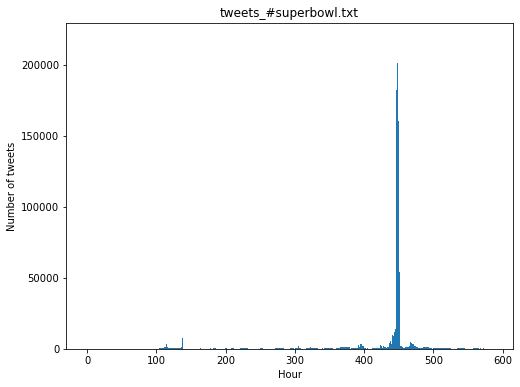

In [13]:
# get file path
tweet_file = 'tweets_#superbowl.txt'
file_path = f'D:\\ECE219\\ECE219_tweet_data\\{tweet_file}'
    
# init
hours = []
num_tweets = 0

# read file and store the needed values
with open(file_path, mode='r', encoding="utf8") as file:
    for line in file:
        tweet = json.loads(line)
        hours.append(tweet['citation_date'])
        num_tweets += 1

# init list of tweet per hour
tweets_hr = [0] * int((max(hours)-min(hours))/3600+1)
start = min(hours)
# start calculating
for i in hours:
    tweets_hr[int((i-start)/3600)] += 1

# plot
f = plt.figure(figsize=(8, 6))    
x = [i for i in range(0,len(tweets_hr))]
plt.bar(x, tweets_hr, 1)
plt.xlabel("Hour")
plt.ylabel("Number of tweets")
plt.title(tweet_file)
plt.show()

### NFL

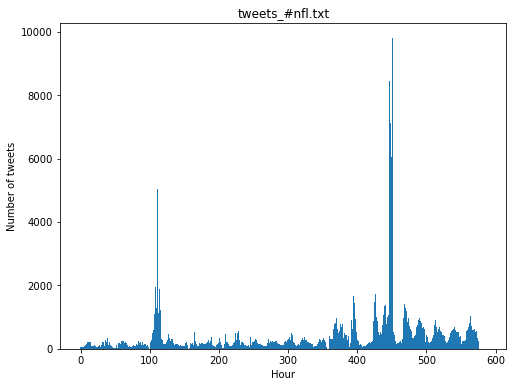

In [14]:
# get file path
tweet_file = 'tweets_#nfl.txt'
file_path = f'D:\\ECE219\\ECE219_tweet_data\\{tweet_file}'
    
# init
hours = []
num_tweets = 0

# read file and store the needed values
with open(file_path, mode='r', encoding="utf8") as file:
    for line in file:
        tweet = json.loads(line)
        hours.append(tweet['citation_date'])
        num_tweets += 1

# init list of tweet per hour
tweets_hr = [0] * int((max(hours)-min(hours))/3600+1)
start = min(hours)
# start calculating
for i in hours:
    tweets_hr[int((i-start)/3600)] += 1

# plot
f = plt.figure(figsize=(8, 6))    
x = [i for i in range(0,len(tweets_hr))]
plt.bar(x, tweets_hr, 1)
plt.xlabel("Hour")
plt.ylabel("Number of tweets")
plt.title(tweet_file)
plt.show()

<div class="alert alert-block alert-success">
<b>QUESTION 9.2:</b> Plot "number of tweets in hour" over time for <b>#SuperBowl</b> and <b>#NFL</b> (a bar plot with 1-hour bins). The tweets are stored in separate files for different hashtags and files are named as tweet [#hashtag].txt.
</div>

<div class="alert alert-block alert-success">
<b>ANSWER 9.2:</b> The plots of "number of tweets in hour" for <b>#SuperBowl</b> and <b>#NFL</b> are shown above.
</div>

<div class="alert alert-block alert-success">
<b>QUESTION 10:</b> Follow the steps outlined below:
<ul>
  <li>Describe your task.</li>
  <li>Explore the data and any metadata (you can even incorporate additional datasets if you choose).</li>
  <li>Describe the feature engineering process. Implement it with reason: Why are you extracting features this way - why not in any other way?</li>
  <li>Generate baselines for your final ML model.</li>
  <li>A thorough evaluation is necessary.</li>
  <li>Be creative in your task design - use things you have learned in other classes too if you are excited about them!</li>
</ul>
</div>

<div class="alert alert-block alert-success">
<b>ANSWER 10:</b> Since this tweet dataset contains tweets that were posted before, during, and after the Superbowl, I want to find out the most indicative features at each time period that correlated to the number of tweets in the next next hour or minute. With such information hand, I can then predict the number of the tweets in the future (Part 1). Moreover, one can even consider using this representative features at each time period along with more complex models to do more complex future prediction such as the predicted winning team, the predicted scores, increment of followers, etc (Part 2). However, since I am doing this project alone and considering the work load, I only complete the first part.
    
For feature engineering process, I extract 'date', 'time', 'tweets', 'followers', 'retweets', 'mentions', 'score', 'hashtags' as the features needed for the training and standardize most of them to avoid imbalance scale range across different features and bias.
</div>

### Get all necessary data and create data frame

In [15]:
# get file path
tweet_file = 'tweets_#superbowl.txt'
file_path = f'D:\\ECE219\\ECE219_tweet_data\\{tweet_file}'

# init
date, time, time_5min = [], [], []
num_tweets, num_followers, num_retweets = [], [], []
num_mentions, rank_score, num_hashtags = [], [], []

# parameter
pst_tz = pytz.timezone('America/Los_Angeles')

# read file and store the needed values
with open(file_path, mode='r', encoding="utf8") as file:
    for line in file:
        tweet = json.loads(line)
        
        # lA time
        timestamp = tweet['citation_date']
        timestamp = str(datetime.datetime.fromtimestamp(int(timestamp), pst_tz))
        time_split = ''.join(timestamp[0:10].split('-'))
        date.append(int(time_split))
        time.append(int(timestamp[11:13]))
        
        # get time windows
        a, b, c, _ = timestamp.split(':')
        rounded = str(int((int(b)/5))*5).zfill(2)
        time_mins = timestamp[11:13] + rounded
        time_5min.append(int(time_mins))
        
        num_tweets.append(1)
        num_followers.append(tweet['author']['followers'])
        num_retweets.append(tweet['metrics']['citations']['total'])
        num_mentions.append(len(tweet['tweet']['entities']['user_mentions']))
        rank_score.append(tweet['metrics']['ranking_score'])
        num_hashtags.append(tweet['title'].count('#'))

In [92]:
columns = ['date', 'time', 'tweets', 'followers', 
           'retweets', 'mentions', 'score', 'hashtags']

df1 = pd.DataFrame({'date': date, 'time': time, 'tweets': num_tweets,
                   'followers': num_followers, 'retweets': num_retweets,
                   'mentions': num_mentions, 'score': rank_score,
                   'hashtags': num_hashtags}, columns=columns)

df1 = df1.groupby(['date', 'time']).agg({'time': np.max, 'tweets': np.sum,
                                         'followers': np.sum, 'retweets': np.sum, 
                                         'mentions': np.sum, 'score': np.sum, 
                                         'hashtags': np.sum})

df_5 = pd.DataFrame({'date': date, 'time': time_5min, 'tweets': num_tweets,
                     'followers': num_followers, 'retweets': num_retweets, 
                     'mentions': num_mentions, 'score': rank_score, 
                     'hashtags': num_hashtags}, columns=columns)

df_5 = df_5.groupby(['date', 'time']).agg({'time': np.max, 'tweets': np.sum,
                                           'followers': np.sum, 'retweets': np.sum, 
                                           'mentions': np.sum, 'score': np.sum, 
                                           'hashtags': np.sum})

time_frame1 = df1.query('date < 20150201 or (date == 20150201 and time < 8)')
time_frame2 = df_5.query('date == 20150201 and (time >= 800 and time <= 2000)')
time_frame3 = df1.query('date > 20150201 or (date == 20150201 and time > 20)')

### Data inspection

In [93]:
time_frame1.head()

time  tweets  followers  retweets  mentions      score  \
date     time                                                           
20150114 0        0       8     3181.0         9        10  33.149173   
         1        1       6    12618.0         8         7  24.862325   
         2        2      12  1406539.0        75         7  61.154177   
         3        3      10     3210.0        10         6  41.463227   
         4        4      11    27896.0        16         7  51.386322   

               hashtags  
date     time            
20150114 0           20  
         1           17  
         2           22  
         3           26  
         4           30

In [94]:
time_frame2.head()

time  tweets   followers  retweets  mentions        score  \
date     time                                                              
20150201 800    800     815  31752316.0      2065       330  3937.105762   
         805    805     838   7014228.0      1706       304  3778.794464   
         810    810     705   3938937.0      1163       294  3229.159620   
         815    815     758   5736082.0      1312       334  3430.129700   
         820    820     747   4954814.0      1168       274  3318.970026   

               hashtags  
date     time            
20150201 800       1799  
         805       2274  
         810       1805  
         815       1779  
         820       2061

In [95]:
time_frame3.head()

time  tweets   followers  retweets  mentions         score  \
date     time                                                               
20150201 21      21    1771  47501907.0     11006       862   8212.099064   
         22      22    2579  15615953.0     10597      1207  11514.393423   
         23      23    1546   9276926.0      4444       638   6838.339453   
20150202 0        0    1097  13775183.0      6362       482   4827.763922   
         1        1     890   4621085.0      1506       396   3927.715512   

               hashtags  
date     time            
20150201 21        5673  
         22        8448  
         23        5121  
20150202 0         3551  
         1         2885

### Data preprocessing

In [98]:
from sklearn.preprocessing import StandardScaler
from sklearn_pandas import DataFrameMapper

'''
Standardize all data in each time frame
'''
mapper = DataFrameMapper([(time_frame1.iloc[:, 2:].columns, StandardScaler())])

# time frame 1
time_frame1_scaled = mapper.fit_transform(time_frame1.iloc[:, 2:].copy(), 
                                          len(time_frame1.iloc[:, 2:].columns))
time_frame1.loc[:, 'followers':] = pd.DataFrame(time_frame1_scaled,
                                             index=time_frame1.iloc[:, 2:].index, 
                                             columns=time_frame1.iloc[:, 2:].columns)

# time frame 2
time_frame2_scaled = mapper.fit_transform(time_frame2.iloc[:, 2:].copy(), 
                                          len(time_frame2.iloc[:, 2:].columns))
time_frame2.loc[:, 'followers':] = pd.DataFrame(time_frame2_scaled,
                                             index=time_frame2.iloc[:, 2:].index, 
                                             columns=time_frame2.iloc[:, 2:].columns)

# time frame 3
time_frame3_scaled = mapper.fit_transform(time_frame3.iloc[:, 2:].copy(), 
                                          len(time_frame3.iloc[:, 2:].columns))
time_frame3.loc[:, 'followers':] = pd.DataFrame(time_frame3_scaled,
                                             index=time_frame3.iloc[:, 2:].index, 
                                             columns=time_frame3.iloc[:, 2:].columns)

### Model training and evaluation

In [100]:
'''
Time frame 1: before Feb. 1, 8:00am - 1 hour window
'''

# get data
X = []
for i in time_frame1.index:
    X.append(time_frame1.loc[i, 'tweets':].values)
X.pop()
X = sm.add_constant(X)
y = time_frame1.loc[time_frame1.index[1]:, 'tweets'].values

# train model and predict
model = sm.OLS(y,X).fit()
pred_y = model.predict(X)

# print
print('MSE for {} for before Feb 1 '\
      '- RMSE: {:5.4f}'.format(tweet_file, np.sqrt(mean_squared_error(y, pred_y))))
print(model.summary())

MSE for tweets_#superbowl.txt for before Feb 1 - RMSE: 695.9451
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     56.28
Date:                Sun, 19 Mar 2023   Prob (F-statistic):           3.06e-51
Time:                        23:03:01   Log-Likelihood:                -3496.3
No. Observations:                 439   AIC:                             7007.
Df Residuals:                     432   BIC:                             7035.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

In [101]:
'''
Time frame 2: between Feb. 1, 8:00am ~ 8:00pm - 5 minutes window
'''

# get data
X = []
for i in time_frame2.index:
    X.append(time_frame2.loc[i, 'tweets':].values)
X.pop()
X = sm.add_constant(X)
y = time_frame2.loc[time_frame2.index[1]:, 'tweets'].values

# train model and predict
model = sm.OLS(y,X).fit()
pred_y = model.predict(X)

# print
print('MSE for {} for between Feb 1 '\
      '- RMSE: {:5.4f}'.format(tweet_file, np.sqrt(mean_squared_error(y, pred_y))))
print(model.summary())

MSE for tweets_#superbowl.txt for between Feb 1 - RMSE: 2443.4510
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     215.4
Date:                Sun, 19 Mar 2023   Prob (F-statistic):           3.51e-67
Time:                        23:03:05   Log-Likelihood:                -1327.7
No. Observations:                 144   AIC:                             2669.
Df Residuals:                     137   BIC:                             2690.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

In [102]:
'''
Time frame 3: after Feb. 1, 8:00pm - 1 hour window
'''

# get data
X = []
for i in time_frame3.index:
    X.append(time_frame3.loc[i, 'tweets':].values)
X.pop()
X = sm.add_constant(X)
y = time_frame3.loc[time_frame3.index[1]:, 'tweets'].values

# train model and predict
model = sm.OLS(y,X).fit()
pred_y = model.predict(X)

# print
print('MSE for {} for after Feb 1 '\
      '- MSE: {:5.4f}'.format(tweet_file, mean_squared_error(y, pred_y)))
print(model.summary())

MSE for tweets_#superbowl.txt for after Feb 1 - MSE: 79534.4816
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     165.9
Date:                Sun, 19 Mar 2023   Prob (F-statistic):           2.54e-57
Time:                        23:03:05   Log-Likelihood:                -939.10
No. Observations:                 133   AIC:                             1892.
Df Residuals:                     126   BIC:                             1912.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

### Discussion

<div class="alert alert-block alert-success">
Before the superbowl started, one can notice that x1('tweets'), x2('followers'), x4('mentions'), x5('score') are the main features that are most informative for predicting the number of tweets in the future since the p-score is almost 0. During the superbowl, x3('retweets') and x5('score') are the most indicative features and after the superbowl, x1('tweets'), x5('score'), and x6('hashtags') are the best features for the prediction of number of tweets in the near future. By combining all together, one can discover that x5('score') is the sole feature that always shows high correlation to the number of tweets in the near future. Therefore, if we want to build a simple model to predict the number of tweets in the near future, we can just choose 'score' as feature and it might already be able to yield good result. However, for more complexe cases, one can use an ensemble of different models trained on those representative features at each time period to achieve high model performance.
</div>